In [1]:
import random
from typing import Any, Callable, Self

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation

In [2]:
class Gene:
    def __init__(
        self,
        chromosome: list = None,
        chromosome_length: int = None,
        boundaries: tuple[float, float] = None,
    ) -> None:
        if chromosome is not None:
            self.chromosome = chromosome
        else:
            self.chromosome = [
                random.uniform(boundaries[0], boundaries[1])
                for _ in range(chromosome_length)
            ]

    def __repr__(self) -> str:
        return str(self.chromosome)

    def apply_function(self, func: Callable) -> Any:
        return func(*self.chromosome)

    def crossover(self, gene: Self) -> Self:
        new_chromosome = []
        for first, second in zip(self.chromosome, gene.chromosome):
            new_chromosome.append(first if random.randint(0, 1) == 0 else second)

        return Gene(new_chromosome)

    def mutate(self, mutation_limit: float, boundaries: tuple[float, float]) -> Self:
        mutated_position = random.randrange(0, len(self.chromosome))
        mutation = random.uniform(-mutation_limit, mutation_limit)

        new_chromosome = self.chromosome.copy()
        mutated_value = new_chromosome[mutated_position] + mutation
        mutated_value = min(boundaries[1], max(boundaries[0], mutated_value))
        new_chromosome[mutated_position] = mutated_value

        return Gene(new_chromosome)

In [3]:
POPULATION_SIZE = 500
TOURNAMENT_SIZE = 100
ITERATIONS_NUMBER = 2000
BOUNDARIES = (-10, 10)

In [4]:
def f_1(x, y):
    return (
        3 * (1 - x) ** 2 * np.exp(-(x**2) - (y + 1) ** 2)
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-(x**2) - y**2)
        - 1 / 3 * np.exp(-((x + 1) ** 2) - y**2)
    )


def apply_f1(gene):
    return gene.apply_function(f_1)

In [5]:
population = [
    Gene(chromosome_length=2, boundaries=BOUNDARIES) for _ in range(POPULATION_SIZE)
]

In [6]:
best = max(population, key=apply_f1)
print(f"{0:<4} : f(x, y) = {apply_f1(best)} : {best}")

for iteration in range(ITERATIONS_NUMBER):
    tournament = random.sample(population, TOURNAMENT_SIZE)
    winners = sorted(tournament, key=apply_f1, reverse=True)[:2]

    new_gene = (
        winners[0]
        .crossover(winners[1])
        .mutate(mutation_limit=0.1, boundaries=BOUNDARIES)
    )
    worst_gene = min(population, key=apply_f1)
    
    population.remove(worst_gene)
    population.append(new_gene)
    
    best = max(population, key=apply_f1)
    print(f"{iteration + 1:<4} : f(x, y) = {apply_f1(best)} : {best}")

0    : f(x, y) = 7.78829393581413 : [-0.11382216577624149, 1.4608316232184215]
1    : f(x, y) = 7.78829393581413 : [-0.11382216577624149, 1.4608316232184215]
2    : f(x, y) = 7.78829393581413 : [-0.11382216577624149, 1.4608316232184215]
3    : f(x, y) = 7.78829393581413 : [-0.11382216577624149, 1.4608316232184215]
4    : f(x, y) = 7.78829393581413 : [-0.11382216577624149, 1.4608316232184215]
5    : f(x, y) = 7.78829393581413 : [-0.11382216577624149, 1.4608316232184215]
6    : f(x, y) = 7.78829393581413 : [-0.11382216577624149, 1.4608316232184215]
7    : f(x, y) = 7.78829393581413 : [-0.11382216577624149, 1.4608316232184215]
8    : f(x, y) = 7.78829393581413 : [-0.11382216577624149, 1.4608316232184215]
9    : f(x, y) = 7.78829393581413 : [-0.11382216577624149, 1.4608316232184215]
10   : f(x, y) = 8.016771242149465 : [-0.11382216577624149, 1.5782050636519147]
11   : f(x, y) = 8.016771242149465 : [-0.11382216577624149, 1.5782050636519147]
12   : f(x, y) = 8.016771242149465 : [-0.113822165

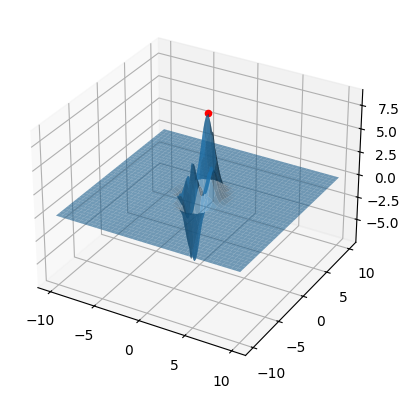

In [7]:
x = np.arange(-10, 10.1, 0.1)
y = np.arange(-10, 10.1, 0.1)
x_meshgrid, y_meshgrid = np.meshgrid(x, y)
z = f_1(x_meshgrid, y_meshgrid)

best = max(population, key=apply_f1)
best_x, best_y = best.chromosome
best_z = best.apply_function(f_1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x_meshgrid, y_meshgrid, z, alpha=0.6)
ax.scatter(best_x, best_y, best_z, c="r")

In [8]:
def f_2(x, y):
    return (
        -0.0001 * (
            np.abs(
                np.sin(x)
                * np.sin(y)
                * np.exp(np.abs(100 - np.sqrt(x**2 + y**2) / np.pi))
            ) + 1
        ) ** 0.1
    )


def apply_f2(gene):
    return gene.apply_function(f_2)

In [9]:
population = [
    Gene(chromosome_length=2, boundaries=BOUNDARIES) for _ in range(POPULATION_SIZE)
]

In [10]:
best = min(population, key=apply_f2)
print(f"{0:<4} : f(x, y) = {apply_f2(best)} : {best}")

for iteration in range(ITERATIONS_NUMBER):
    tournament = random.sample(population, TOURNAMENT_SIZE)
    winners = sorted(tournament, key=apply_f2)[:2]

    new_gene = (
        winners[0]
        .crossover(winners[1])
        .mutate(mutation_limit=0.1, boundaries=BOUNDARIES)
    )
    worst_gene = max(population, key=apply_f2)
    
    population.remove(worst_gene)
    population.append(new_gene)
    
    best = min(population, key=apply_f2)
    print(f"{iteration + 1:<4} : f(x, y) = {apply_f2(best)} : {best}")

0    : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
1    : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
2    : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
3    : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
4    : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
5    : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
6    : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
7    : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
8    : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
9    : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
10   : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
11   : f(x, y) = -2.056675135269493 : [-1.1346031070436435, 1.2795736127297346]
12   : f(x, y) = -2.056675135269493 : [-

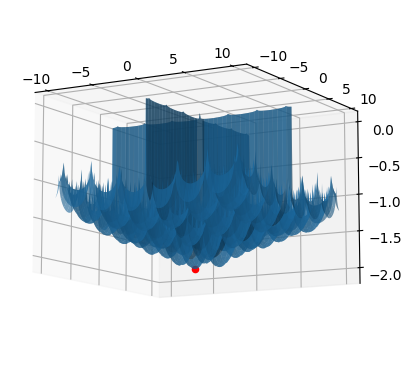

In [11]:
x = np.arange(-10, 10.1, 0.1)
y = np.arange(-10, 10.1, 0.1)
x_meshgrid, y_meshgrid = np.meshgrid(x, y)
z = f_2(x_meshgrid, y_meshgrid)

best = min(population, key=apply_f2)
best_x, best_y = best.chromosome
best_z = best.apply_function(f_2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x_meshgrid, y_meshgrid, z, alpha=0.6)
ax.scatter(best_x, best_y, best_z, c="r")
ax.elev = -10

In [12]:
def azim_animation(frame):
    ax.azim = -80 + frame * 2
    
ani = animation.FuncAnimation(fig=fig, func=azim_animation, frames=35, interval=100)
HTML(ani.to_jshtml())